# Convolutions

In this lab, we'll look in detail at convolutions and how they can be used to process images. 

### Reading and opening images

We'll use the `skimage` library to read and process images. It's a library dedicated to image processing, which is part of the `scikit-learn` family.

In [33]:
!pip install scikit-image
!pip install imageio[pyav]
!pip install imageio[opencv]
!pip install pillow
!pip install opencv-python

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread

In [35]:
# Helper function to download images from our GitHub repo

def download_image(image_name):
    url = "https://raw.githubusercontent.com/shabiga/deep_learning/main/01_materials/labs/images/{image_name}" + image_name
    import requests
    r = requests.get(url)
    with open(image_name, 'wb') as f:
        f.write(r.content)

In [36]:
download_image("bumblebee.png")
sample_image = imread("bumblebee.png")
sample_image= sample_image.astype("float32")

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

ValueError: need at least one array to stack

Download successful.
File exists: bumblebee.png
Sample image shape: (600, 600, 3)


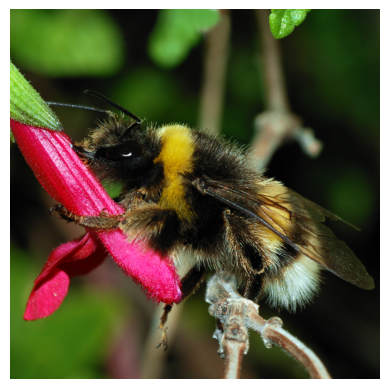

In [37]:
import os
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to download the image
def download_image(image_name):
    url = f"https://raw.githubusercontent.com/shabiga/deep_learning/main/01_materials/labs/images/{image_name}"
    response = requests.get(url)
    if response.status_code == 200:
        with open(image_name, 'wb') as f:
            f.write(response.content)
        print("Download successful.")
    else:
        print("Failed to download image, status code:", response.status_code)

# Redownload the image
download_image("bumblebee.png")

# Path to the downloaded image
file_path = "bumblebee.png"

# Check if the file exists
if os.path.exists(file_path):
    print("File exists:", file_path)
else:
    print("File does not exist:", file_path)

# Try opening the image using Pillow
try:
    sample_image = Image.open(file_path)
    # Convert the image to a NumPy array
    sample_image_array = np.array(sample_image).astype("float32")

    # Print the shape of the image array
    size = sample_image_array.shape
    print("Sample image shape:", size)

    # Display the image using Matplotlib
    plt.imshow(sample_image_array.astype('uint8'))
    plt.axis('off')  # Hide axis
    plt.show()
except Exception as e:
    print("An error occurred with Pillow:", e)


### A simple convolution filter

Before we start working on training any models, let's look at applying a convolution filter to an image. We'll use the `Conv2D` layer from Keras to do this.

In [38]:
from tensorflow.keras.layers import Conv2D

In [39]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. This is a neat feature of convolutional neural networks: the same model can be used to process images of any size, because all we have to do is slide the convolutional filter across the image as much as necessary.

In [40]:
sample_image.shape

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [41]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

In [42]:
img_out = conv(img_in) # Apply the convolutional filter

ValueError: Exception encountered when calling Conv2D.call().

[1mIncompatible type conversion requested to type uint8 for `tf.Variable of type float32. (Variable: <tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 3, 3) dtype=float32, numpy=
array([[[[-1.64821580e-01, -1.03159480e-01, -7.72511959e-02],
         [-1.36956364e-01, -4.38825190e-02,  1.45900533e-01],
         [-4.92279977e-02, -8.30373317e-02, -1.12398580e-01]],

        [[-1.67239577e-01, -1.45981312e-01,  1.71408460e-01],
         [-6.82100654e-03, -1.30036891e-01, -6.67545348e-02],
         [ 1.65692613e-01, -9.50470939e-02, -1.81342840e-01]],

        [[ 3.99383008e-02, -1.44252822e-01,  9.76990312e-02],
         [-1.05656914e-01,  1.28915027e-01,  6.08838648e-02],
         [ 4.96525764e-02,  1.98019788e-01,  1.85594097e-01]],

        [[ 1.08670130e-01, -6.10388815e-02,  5.06559461e-02],
         [ 1.68933496e-01, -8.06156620e-02,  1.06112495e-01],
         [-8.37081447e-02, -6.64106905e-02,  1.50445983e-01]],

        [[ 1.10226110e-01, -3.23426276e-02, -3.46559584e-02],
         [ 2.58032829e-02,  1.36792660e-02, -8.35205093e-02],
         [ 8.67952853e-02, -7.14391768e-02, -1.09484769e-01]]],


       [[[ 1.13385811e-01,  1.20981976e-01,  2.84502059e-02],
         [ 1.97141275e-01,  1.65952817e-01, -1.83703810e-01],
         [ 1.72302917e-01, -1.67389780e-01,  1.65350333e-01]],

        [[-2.80582905e-02, -8.78717899e-02,  1.28663972e-01],
         [-1.30653381e-04,  2.63401568e-02,  4.25999612e-02],
         [ 5.68448156e-02, -7.21520483e-02,  1.07325092e-01]],

        [[-1.48537114e-01, -2.82737762e-02, -3.09874117e-02],
         [-4.80879843e-02,  4.93973792e-02,  3.42123508e-02],
         [ 1.35318533e-01, -8.37823376e-02,  1.75682172e-01]],

        [[ 1.20039806e-01,  1.74653664e-01, -1.69188783e-01],
         [-1.46947861e-01, -1.71400025e-01, -3.28530818e-02],
         [ 3.72999161e-02, -1.79931402e-01, -1.25122964e-02]],

        [[-8.73673484e-02,  3.45181525e-02, -1.71345472e-01],
         [-1.07326463e-01, -3.95154059e-02, -1.48302361e-01],
         [ 9.83353108e-02, -9.65924561e-03, -1.27134323e-02]]],


       [[[-7.87105560e-02, -3.64199132e-02, -1.05376534e-01],
         [-1.57479525e-01, -9.19166580e-02, -1.41805455e-01],
         [-1.79356962e-01,  1.05896428e-01, -1.09645367e-01]],

        [[-1.29461139e-01,  1.28901675e-01,  8.62037688e-02],
         [-6.87582046e-02, -7.66505748e-02, -1.82594165e-01],
         [ 1.81919202e-01, -1.85404345e-01,  1.44615218e-01]],

        [[-1.60637051e-01,  1.71509758e-01, -1.59895137e-01],
         [-1.39636666e-01, -1.11246303e-01, -6.79220706e-02],
         [ 1.73486039e-01,  1.14073768e-01,  3.54443491e-02]],

        [[-5.48954010e-02,  9.76470560e-02,  1.64558887e-02],
         [-1.40567824e-01, -4.71920073e-02, -1.38736635e-01],
         [ 1.79757223e-01,  4.25843298e-02, -1.77460715e-01]],

        [[-1.69394910e-02, -1.52365834e-01,  9.71060246e-02],
         [-1.97136551e-01, -1.27234459e-01, -1.15846872e-01],
         [ 1.93418369e-01, -7.69404918e-02,  1.29217759e-01]]],


       [[[ 4.17035073e-02,  9.48527902e-02,  6.35423213e-02],
         [-1.19922303e-01,  7.87961930e-02,  7.74842352e-02],
         [ 1.53211132e-01,  1.16521642e-01, -9.03259292e-02]],

        [[ 7.05293268e-02, -2.16979086e-02,  1.90086260e-01],
         [-1.63716078e-01,  5.61481863e-02, -1.07538320e-01],
         [ 1.52670011e-01,  1.72142133e-01,  1.81988195e-01]],

        [[ 1.73576772e-02,  1.76905349e-01, -7.69431591e-02],
         [-1.30305737e-02,  4.03095186e-02,  1.35265872e-01],
         [-3.19269598e-02, -1.89063355e-01,  1.63547650e-01]],

        [[ 1.77333638e-01,  3.92570943e-02, -1.10436976e-02],
         [ 1.99310645e-01, -1.93615347e-01, -1.69377044e-01],
         [ 6.13167882e-04,  1.56854585e-01, -1.52010724e-01]],

        [[ 1.55047461e-01, -5.59580773e-02, -9.74601284e-02],
         [-1.53671503e-01, -6.56609982e-02, -1.57395214e-01],
         [-2.41404027e-02,  2.23043412e-02,  1.98100105e-01]]],


       [[[-1.89512774e-01, -1.22562312e-01,  1.95723340e-01],
         [-6.21422827e-02,  8.43471438e-02,  1.86691001e-01],
         [-8.94000083e-02,  1.60971746e-01, -4.35980856e-02]],

        [[ 7.87117928e-02, -9.14099738e-02, -1.05911449e-01],
         [ 8.94127041e-02,  7.60792345e-02,  3.74332964e-02],
         [-1.33479893e-01, -1.17921785e-01,  1.54294834e-01]],

        [[ 4.62752283e-02,  1.80193469e-01, -1.84535027e-01],
         [-5.29279262e-02,  5.72197884e-02, -1.19342804e-02],
         [ 1.15015373e-01, -1.06101327e-01, -1.04714207e-01]],

        [[ 1.06916919e-01,  1.92002252e-01, -1.28018290e-01],
         [ 9.82865691e-03, -4.88445312e-02, -7.36385882e-02],
         [-1.66961908e-01, -7.21879900e-02,  2.86902487e-02]],

        [[-1.86137825e-01, -1.89764932e-01, -1.19971231e-01],
         [ 1.23610541e-01, -1.40877292e-01, -1.78223997e-01],
         [ 1.91429332e-01,  7.48856217e-02,  8.75008255e-02]]]],
      dtype=float32)>)[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 600, 600, 3), dtype=uint8)

The output is a tensorflow Eager Tensor - a special data structure that is used to represent the result of operations in TensorFlow. It is not a numpy array, but it can be converted to one using the `.numpy()` method:

In [43]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))
print(np_img_out.shape)

NameError: name 'img_out' is not defined

AttributeError: 'PngImageFile' object has no attribute 'astype'

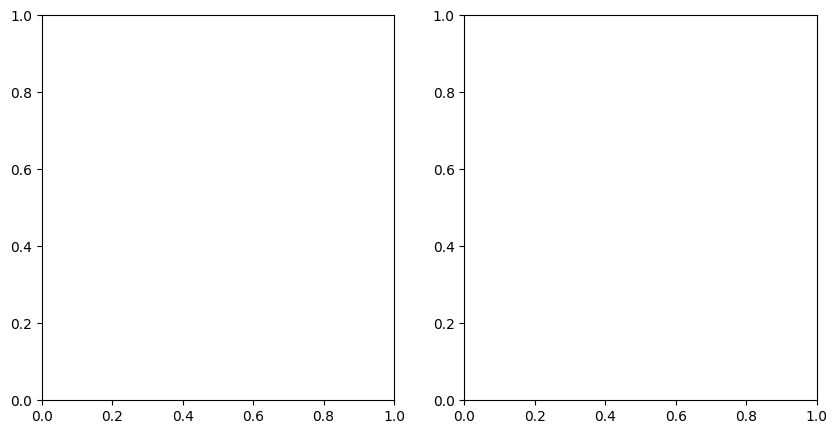

In [44]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

As we can see, our convolutional filter was initialized randomly, so our output doesn't contain any specific meaning. Each pixel is a random combination of the pixels in the input image, in a 5x5 window.

Let's instead take a look at a convolutional feature with a clear purpose. We can build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. Before you move to the next cell, can you guess what this filter will do?

In [45]:
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

Now we can use this function to initialize a `Conv2D` layer:

In [46]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_kernel)

ValueError: Exception encountered when calling Conv2D.call().

[1mIncompatible type conversion requested to type uint8 for `tf.Variable of type float32. (Variable: <tf.Variable 'conv2d_2/kernel:0' shape=(5, 5, 3, 3) dtype=float32, numpy=
array([[[[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]]],


       [[[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]]],


       [[[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]]],


       [[[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]]],


       [[[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]],

        [[0.04, 0.  , 0.  ],
         [0.  , 0.04, 0.  ],
         [0.  , 0.  , 0.04]]]], dtype=float32)>)[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 600, 600, 3), dtype=uint8)

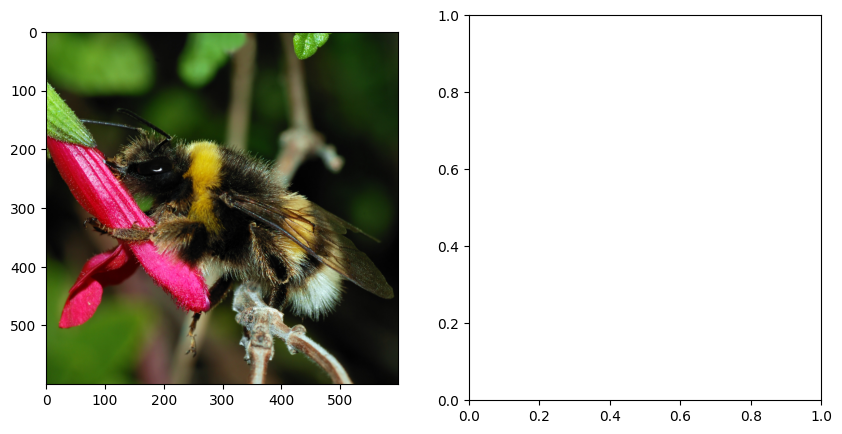

In [47]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

Hopefully you can tell what this filter does! 

**Exercise**
- There are a number of settings when we define our Conv2D layer. Try changing the following parameters to get a sense of how they impact the result:
- kernel_size: try different sizes
- padding: try 'valid' instead of 'same' (hint: this may change the size of the output)

c:\Users\shabiga\scaling_to_production\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Conv2D.call().

[1mIncompatible type conversion requested to type uint8 for `tf.Variable of type float32. (Variable: <tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 3, 3) dtype=float32, numpy=
array([[[[-3.07960510e-01,  3.08254331e-01,  3.27331454e-01],
         [ 1.91286951e-01,  3.51796150e-02,  3.30582052e-01],
         [-1.13507211e-02,  2.91303009e-01,  9.15122032e-03]],

        [[-3.01676273e-01,  2.24532932e-01, -2.12379217e-01],
         [-1.11901447e-01,  7.99701214e-02, -1.82070583e-01],
         [ 1.91642314e-01,  1.40697241e-01, -4.29344177e-03]],

        [[ 2.29860395e-01, -1.31114244e-01, -1.59684107e-01],
         [-1.99426338e-01, -3.21408033e-01, -2.28065968e-01],
         [-3.95783782e-03, -2.98097223e-01, -3.02424610e-01]]],


       [[[-2.02670574e-01, -1.63683265e-01,  1.28346354e-01],
         [-6.78587854e-02,  3.32669407e-01,  2.73985058e-01],
         [ 2.43840784e-01,  2.46060640e-01, -8.18499625e-02]],

        [[-1.63472265e-01, -2.53360033e-01,  5.75613976e-02],
         [ 9.45990980e-02, -4.38646376e-02,  3.18767458e-01],
         [ 3.16315591e-02, -9.58207548e-02, -2.50301450e-01]],

        [[ 2.74502188e-01, -1.37146875e-01,  3.79638672e-02],
         [-5.08922040e-02,  3.48985195e-05,  6.95420206e-02],
         [-6.96345270e-02,  8.85697305e-02, -7.78407156e-02]]],


       [[[ 7.39440322e-03, -2.62699693e-01,  1.87433571e-01],
         [ 2.73376495e-01,  1.20305389e-01,  2.82752782e-01],
         [ 2.11410552e-01,  3.41857970e-02,  5.91024756e-03]],

        [[ 2.31564671e-01,  2.38922536e-02, -2.76513904e-01],
         [-4.55941260e-02, -1.97021008e-01,  2.49369949e-01],
         [-7.32406974e-03,  2.27917820e-01,  2.14888901e-01]],

        [[-3.17835808e-03,  1.66186184e-01,  2.59994656e-01],
         [ 1.01008087e-01, -9.34272707e-02, -1.02055788e-01],
         [ 1.09587342e-01, -1.19948626e-01, -2.00220823e-01]]]],
      dtype=float32)>)[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(1, 600, 600, 3), dtype=uint8)

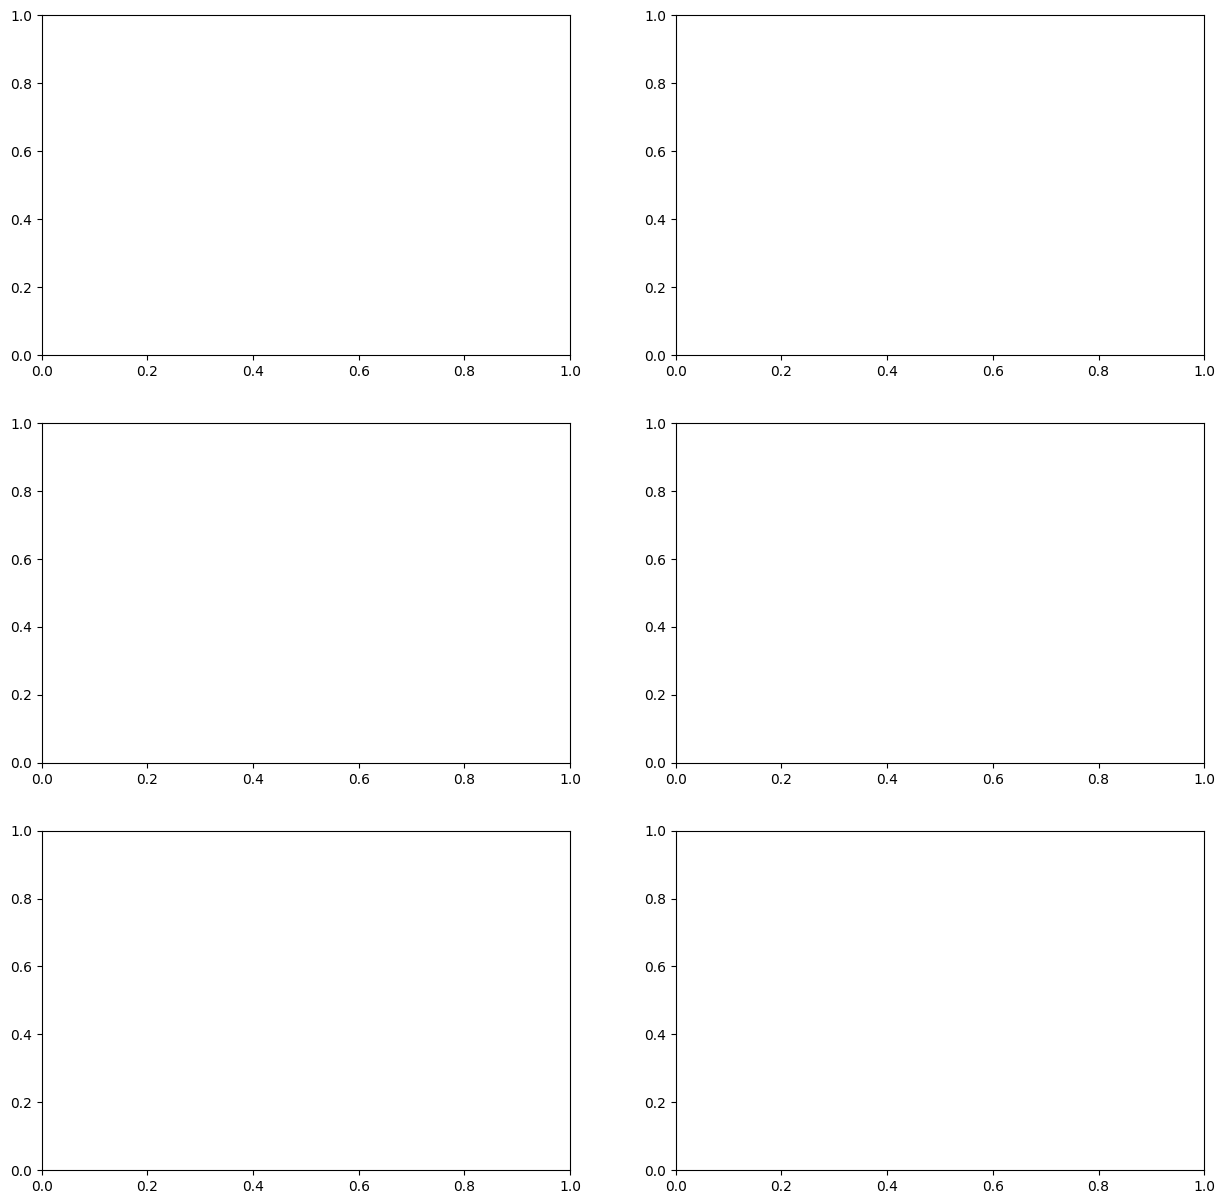

In [58]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D
import tensorflow as tf

def apply_conv2d(kernel_size, padding):
    # Define the Conv2D layer with specified kernel size and padding
    conv = Conv2D(filters=3, kernel_size=kernel_size, padding=padding, input_shape=(None, None, 3))
    
    # Apply the convolutional filter
    img_in = np.expand_dims(sample_image, 0)
    img_out = conv(img_in)
    np_img_out = img_out[0].numpy()
    
    return np_img_out

# Define kernel sizes and paddings to experiment with
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
paddings = ["same", "valid"]

# Create subplots
fig, axes = plt.subplots(len(kernel_sizes), len(paddings), figsize=(15, 15))

# Loop through kernel sizes and paddings
for i, kernel_size in enumerate(kernel_sizes):
    for j, padding in enumerate(paddings):
        np_img_out = apply_conv2d(kernel_size, padding)
        
        ax = axes[i, j]
        ax.imshow(np_img_out.astype('uint8'))
        ax.set_title(f'Kernel: {kernel_size}, Padding: {padding}')
        ax.axis('off')

plt.tight_layout()
plt.show()


### Working on edge detection on Grayscale image

Using a grayscale image, let's build an "edge detector" using a convolutional filter. Some filters pre-date the deep learning era and are still used today. For example, the Sobel filter is used to detect edges in images. These easy-to-compute filters were used in the early days of computer vision and are still useful now.

In [48]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]

# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

AttributeError: 'PngImageFile' object has no attribute 'mean'

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image by defining the kernel inside `my_kernel`.
- You may experiment with several kernels to find a way to detect edges. The following article contains specific examples of kernels that you can use:
- https://en.wikipedia.org/wiki/Kernel_(image_processing)
- Try different kernels and see the impact on the output.

In [49]:
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    array = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]]) # Replace with your kernel
    array = array.reshape(*shape) # Reshape if needed
    return array

conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
              input_shape=(None, None, 1), kernel_initializer=my_kernel)

img_in = np.expand_dims(grey_sample_image, 0) # Reshape into a batch of size 1
img_out = conv(img_in) # Apply the convolutional filter
np_img_out = img_out[0].numpy() # Convert to numpy array

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
ax1.imshow(np_img_out.astype(np.uint8), cmap=plt.cm.gray);


NameError: name 'grey_sample_image' is not defined

### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

In [50]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

# You can use `img_in` from above as input to the pooling layers

plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

NameError: name 'grey_sample_image' is not defined

## Loading a JPEG file as a numpy array

Let's use [scikit-image](http://scikit-image.rg) to load the content of a JPEG file into a numpy array:

Download successful.


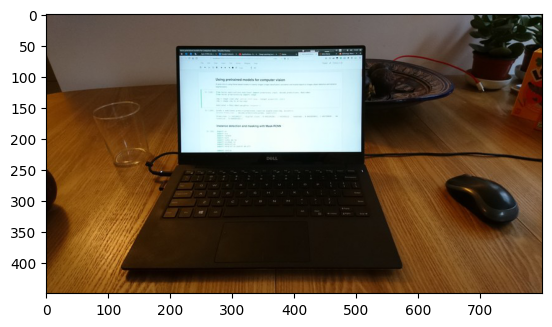

In [51]:
from skimage.io import imread

download_image('laptop.jpeg')
image = imread('laptop.jpeg')
plt.imshow(image);

## Resizing images, handling data types and dynamic ranges

While convolutions can handle inputs of any size, it is often useful to resize images to a fixed size. This is particularly important for training deep learning models:

- for **image classification**, most networks expect a specific **fixed input size**;

- for **object detection** and instance segmentation, networks have more flexibility but the image should have **approximately the same size as the training set images**.

Furthermore **large images can be much slower to process** than smaller images (the number of pixels varies quadratically with the height and width).

In [52]:
from skimage.transform import resize

lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

(50, 50, 3)

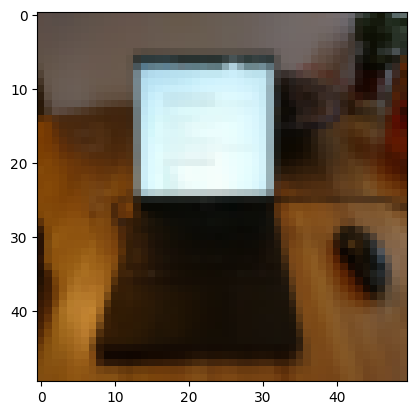

In [53]:
plt.imshow(lowres_image, interpolation='nearest');

The values of the pixels of the low resolution image are computed from by combining the values of the pixels in the high resolution image. The result is therefore represented as floating points. 

## Using a pretrained model

Objectives:

- Load a pre-trained ResNet50 pre-trained model using Keras Zoo
- Use the model to classify an image
- Use the model to classify an image from the webcam

Let's start with loading ResNet50, a well-established method for image classification. The ResNet50 "application" takes two key parameters here: firstly, `include_top` indicates whether we want to include the last layer of the network (the classification layer) or not. Secondly, `weights` indicates whether we want to load the weights of a model that has been pre-trained on ImageNet or not.

In [54]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True, weights='imagenet')
model.compile(optimizer='sgd', loss='categorical_crossentropy')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [55]:
print(model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


### Classification of an image

**Exercise**
- Reshape the `laptop` image to the shape `(224, 224, 3)` using `resize` from `skimage.transform`
- Use `preprocess_input` from `tensorflow.keras.applications.imagenet_utils` to preprocess the image
- Use `predict` to classify the image

Documentation for each method:
- [resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize)
- [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input)
- [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.66804462073245..-102.939].


1: digital_clock (0.07)
2: web_site (0.06)
3: matchstick (0.05)


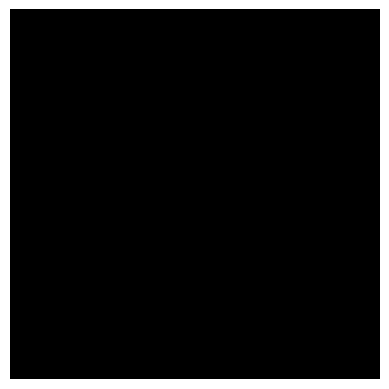

In [59]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# Your code here
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and resize the image
image = imread('laptop.jpeg')
image_resized = resize(image, (224, 224), mode='reflect')

# Ensure image has 3 channels
if image_resized.shape[-1] == 1:
    image_resized = np.repeat(image_resized, 3, axis=-1)

# Preprocess the image and add batch dimension
image_preprocessed = preprocess_input(image_resized)
image_batch = np.expand_dims(image_preprocessed, axis=0)

# Predict the class of the image
predictions = model.predict(image_batch)

# Decode and print the top 3 predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

# Display the resized image
plt.imshow(image_resized)
plt.axis('off')
plt.show()


##  Taking snapshots from the webcam

For this section, we will take an image from your laptop webcam and classify it. If you feel uncomfortable doing this section, you can skip it and use a photo of your choice from the web instead.

In [56]:
import cv2

def camera_grab(camera_id=0, fallback_filename=None):
    camera = cv2.VideoCapture(camera_id)
    try:
        # take 10 consecutive snapshots to let the camera automatically tune
        # itself and hope that the contrast and lighting of the last snapshot
        # is good enough.
        for i in range(10):
            snapshot_ok, image = camera.read()
        if snapshot_ok:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            print("WARNING: could not access camera")
            if fallback_filename:
                image = imread(fallback_filename)
    finally:
        camera.release()
    return image

dtype: uint8, shape: (480, 640, 3), range: (0, 14)


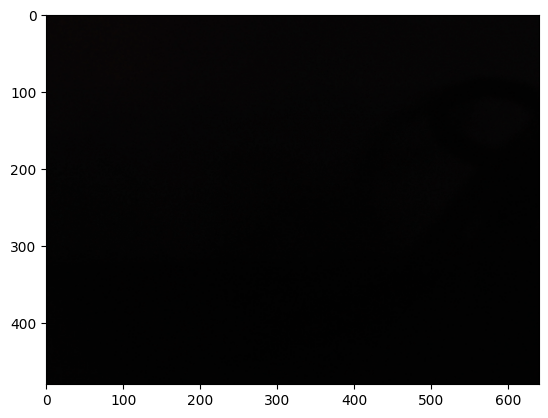

In [57]:
image = camera_grab(camera_id=0, fallback_filename='laptop.jpeg')
plt.imshow(image)
print("dtype: {}, shape: {}, range: {}".format(
    image.dtype, image.shape, (image.min(), image.max())))


### Exercise

Apply the same preprocessing as before and classify the image. What are your results?

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.66804462073245..-102.939].


Top 3 predictions:
1: digital_clock (0.07)
2: web_site (0.06)
3: matchstick (0.05)


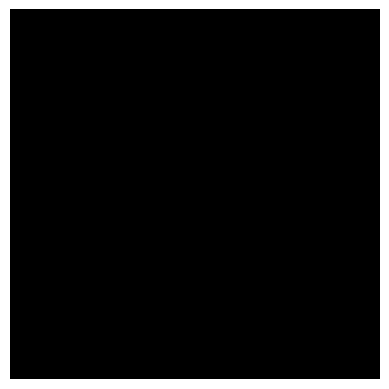

In [60]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and resize the image
image = imread('laptop.jpeg')
resized_image = resize(image, (224, 224), mode='reflect', anti_aliasing=True)

# Ensure the image has the right number of channels
if resized_image.shape[-1] != 3:
    resized_image = np.concatenate([resized_image] * 3, axis=-1)

# Expand dimensions to match model input shape
resized_image = np.expand_dims(resized_image, axis=0)

# Preprocess the image
preprocessed_image = preprocess_input(resized_image)

# Classify the image
predictions = model.predict(preprocessed_image)

# Decode and display the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]

print("Top 3 predictions:")
for i, (class_id, class_name, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {class_name} ({score:.2f})")

# Display the resized image
plt.imshow(resized_image[0])
plt.axis('off')
plt.show()
